# Simple Pendulum Equation
Little notebook to run some checks on `pandas_alive` under development mode.
When using `conda` (either via Anaconda3 or Miniconda3) make sure to activate the right python env for this project in the Anaconda terminal before launching Jupyter; e.g. `conda activate py38-pandas_alive`, followed by `jupyter notebook`.

In [1]:
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import pandas_alive
from IPython.display import Video

# allow Jupyter to embed plots
%matplotlib inline

In [2]:
# check that main tools' versions in Python (conda) env match original development [ see project 'requirements.txt' ]
# print versions of main tools used
pyV = platform.python_version()
ipyV = ! ipython --version
pandasV = pd.__version__
jupV = ! jupyter notebook --version
npV = np.__version__
import matplotlib
pltV = matplotlib.__version__
p_a = pandas_alive.version
winV = platform.version()

ver_info = [[pyV, ipyV[0], pandasV, jupV[0], npV, pltV, p_a, winV]]
pkg_list = ["Python", "iPython", "Pandas", "Jupyter", "NumPy", "MatPlotLib", "pandas_alive", "Windows"]

print("Main package versions in this notebook:")
version_info = pd.DataFrame(data=ver_info, columns=pkg_list)
version_info

Main package versions in this notebook:


,Python,iPython,Pandas,Jupyter,NumPy,MatPlotLib,pandas_alive,Windows
0,3.8.5,7.18.1,1.0.3,6.1.3,1.19.1,3.2.1,0.2.3,10.0.19041


In [3]:
matplotlib.animation.writers.list()

['pillow', 'ffmpeg', 'ffmpeg_file', 'html']

In [4]:
# Physical constants
g = 9.81
L = 2
mu = 0.2

THETA_0 = np.pi / 3  # init angle = 60degs
THETA_DOT_0 = 0  # no init angVel
DELTA_T = 0.01  # time stepping
T = 1.5  # time period

In [5]:
# Definition of ODE (ordinary differential equation)
def get_theta_double_dot(theta, theta_dot):
    return -mu * theta_dot - (g / L) * np.sin(theta)

In [6]:
# Solution to the differential equation
def pendulum(t):
    # initialise changing values
    theta = THETA_0
    theta_dot = THETA_DOT_0
    delta_t = DELTA_T
    ang = []
    ang_vel = []
    ang_acc = []
    times = []
    for time in np.arange(0, t, delta_t):
        theta_double_dot = get_theta_double_dot(
            theta, theta_dot
        )
        theta += theta_dot * delta_t
        theta_dot += theta_double_dot * delta_t
        times.append(time)
        ang.append(theta)
        ang_vel.append(theta_dot)
        ang_acc.append(theta_double_dot)
    data = np.array([ang, ang_vel, ang_acc])
    return pd.DataFrame(data=data.T, index=np.array(times),columns=["angle [rad]", "ang_vel [rad/s]", "ang_acc [rad/s^2]"])

In [7]:
df = pendulum(T)
df.index.names = ["Time (s)"]
df
# len(df.index)

,angle [rad],ang_vel [rad/s],ang_acc [rad/s^2]
Time (s),,,
0.00,1.047198,-0.042479,-4.247855
0.01,1.046773,-0.084872,-4.239359
0.02,1.045924,-0.127171,-4.229838
0.03,1.044652,-0.169363,-4.219294
0.04,1.042959,-0.211441,-4.207726
...,...,...,...
1.45,-0.918014,-0.202019,3.937593
1.46,-0.920034,-0.162649,3.936921
1.47,-0.921661,-0.123299,3.935057


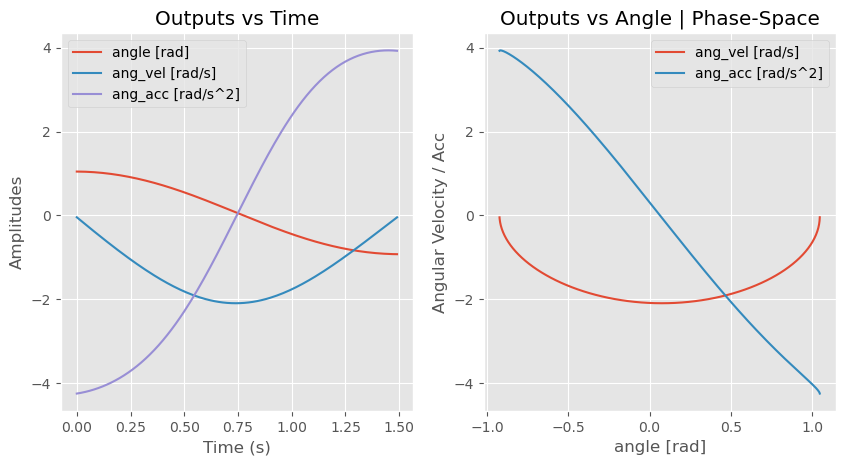

In [8]:
# from matplotlib import rcParams
# rcParams.update({"figure.autolayout": False})

plt.style.use('ggplot')  # set plot style

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5), dpi=100)   # 1 row, 2 subplots
# fig.subplots_adjust(wspace=0.1)      # space subplots in row
fontsize = "medium"

df.plot(ax=ax1, title="Outputs vs Time", fontsize=fontsize).legend(fontsize=fontsize)
ax1.set_ylabel('Amplitudes');

df.plot(ax=ax2, x="angle [rad]", y=["ang_vel [rad/s]", "ang_acc [rad/s^2]"], 
        title="Outputs vs Angle | Phase-Space", fontsize=fontsize).legend(fontsize=fontsize)
# ax2.set_xlabel('Angle [rad]')
ax2.set_ylabel('Angular Velocity / Acc');

In [9]:
line_chart = df.plot_animated(filename=None, kind='line', period_label={'x':0.1,'y':0.9},
                 steps_per_period=1, interpolate_period=False, period_length=50, period_fmt='Time:{x:10.2f}',
                 enable_progress_bar=False, fixed_max=True, figsize=(3,4), dpi=100
                )

Generating LineChart, plotting ['angle [rad]', 'ang_vel [rad/s]', 'ang_acc [rad/s^2]']


In [10]:
Video('./pend-line.mp4', html_attributes="controls muted")

In [11]:
race_chart = df.plot_animated(filename='pend-race.mp4', kind='race', period_label={'x':0.1,'y':0.9},
                 steps_per_period=1, interpolate_period=False, period_length=50, period_fmt='Time:{x:10.2f}',
                 enable_progress_bar=True, fixed_max=False, figsize=(3,4), period_summary_func=False, dpi=100
                )

Generating BarChartRace, plotting ['angle [rad]', 'ang_vel [rad/s]', 'ang_acc [rad/s^2]']


In [12]:
Video('./pend-race.mp4', html_attributes="controls muted")

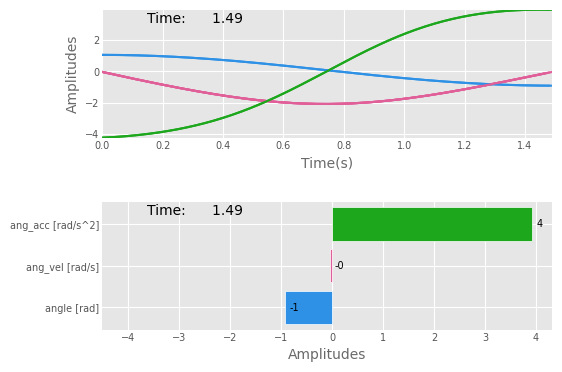

In [13]:
# Otherwise titles overlap and adjust_subplot does nothing
from matplotlib import rcParams
rcParams.update({"figure.autolayout": False})

figs = plt.figure(figsize=(6, 4), dpi=100)
gs = figs.add_gridspec(2, 1, hspace=0.5)

ax1 = figs.add_subplot(gs[0, 0])
ax1.set_title("Angle, Ang_Velocity & ang_acceleration")
ax1.set_xlabel("Time(s)", color='dimgray', fontsize=fontsize)
ax1.set_ylabel("Amplitudes", color='dimgray', fontsize=fontsize)
line_chart.ax = ax1

ax2 = figs.add_subplot(gs[1, 0])
ax2.set_title("Angle, Ang_Velocity & ang_acceleration")
ax2.set_xlabel("Amplitudes", color='dimgray', fontsize=fontsize)
ax2.set_ylabel("", color='dimgray', fontsize=fontsize)
race_chart.ax = ax2

plots = [line_chart, race_chart]

pandas_alive.animate_multiple_plots(
    filename='./pend-combined.mp4', plots=plots, custom_fig=figs, dpi=100, enable_progress_bar=True
)

In [14]:
print("MP4 version")
Video('pend-combined.mp4', html_attributes="controls muted")

MP4 version


GIF version
![Example GIF](./pend-combined.gif)

In [15]:
period_length = 50
steps_per_period = 1
fps = 1000 / period_length * steps_per_period
display("FPS: "+str(fps)+" | Time: "+str(1/fps)+"s")

'FPS: 20.0 | Time: 0.05s'

In [16]:
# %%bash
# jupyter nbconvert --no-input pendulum_sample